In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.style.use('ggplot')
%matplotlib inline

# Load both datasets for visual EDA

In [123]:
neos_df = pd.read_csv('data/neos.csv', low_memory=False)

In [26]:
with open('data/cad.json') as json_data:
    cad_dict = json.load(json_data)

In [21]:
cad_df = pd.DataFrame.from_dict(cad_dict['data']) #, orient='index').T.set_index('index')

In [27]:
cad_df.columns = list(cad_dict['fields'])

# Suggested exploratory questions

#### How many NEOs are in the neos.csv data set?

In [33]:
len(neos_df)

23967

#### What is the primary designation of the first Near Earth Object in the neos.csv data set?

In [41]:
neos_df.pdes[0]

'433'

#### What is the diameter of the NEO whose name is "Apollo"?

In [53]:
neos_df.loc[neos_df.name=='Apollo']["diameter"]

10    1.5
Name: diameter, dtype: float64

#### How many NEOs have IAU names in the data set?

In [60]:
np.sum(neos_df.name.count())

343

#### How many NEOs have diameters in the data set?

In [61]:
np.sum(neos_df.diameter.count())

1268

#### How many close approaches are in the cad.json data set

In [62]:
len(cad_df)

406785

#### On January 1st, 2000, how close did the NEO whose primary designation is "2015 CL" pass by Earth?

In [89]:
cad_df.loc[(cad_df.cd >"1999-Dec-31") & (cad_df.cd < "2000-Jan-2") & (cad_df.des == "2015 CL")].dist

180844    0.144929602021186
Name: dist, dtype: object

#### On January 1st, 2000, how fast did the NEO whose primary designation is "2002 PB" pass by Earth?

In [90]:
cad_df.loc[(cad_df.cd > "1999-Dec-31") & (cad_df.cd < "2000-Jan-2") & (cad_df.des == "2002 PB")].v_rel

180845    29.3862908945476
Name: v_rel, dtype: object

# Plots for better visual analysis

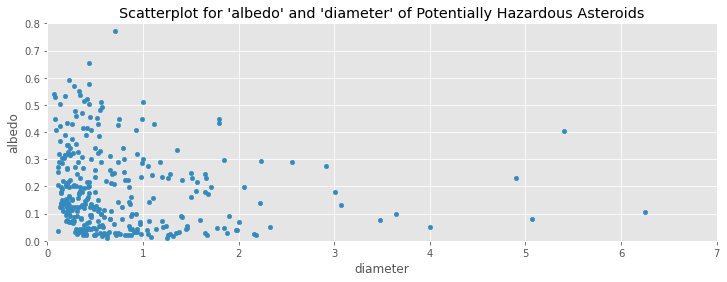

In [362]:
ax = neos_df.loc[neos_df.pha == "Y"].plot.scatter('diameter', 'albedo', figsize=(12, 4))
ax.set_title("Scatterplot for 'albedo' and 'diameter' of Potentially Hazardous Asteroids")
ax.set_xlim((0, 7))
ax.set_ylim((0, 0.8))
plt.show()

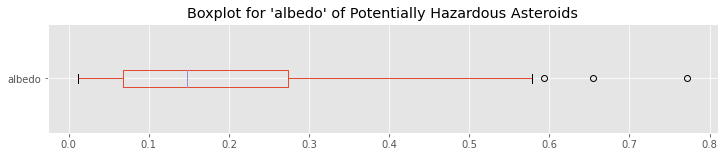

In [363]:
ax = neos_df.loc[neos_df.pha =="Y"].boxplot(column="albedo", vert=False, figsize=(12, 2))
ax.set_title ("Boxplot for 'albedo' of Potentially Hazardous Asteroids")
plt.show()

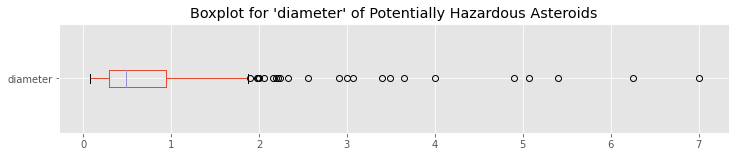

In [364]:
ax = neos_df.loc[neos_df.pha =="Y"].boxplot(column="diameter", vert=False, figsize=(12, 2))
ax.set_title ("Boxplot for 'diameter' of Potentially Hazardous Asteroids")
plt.show()

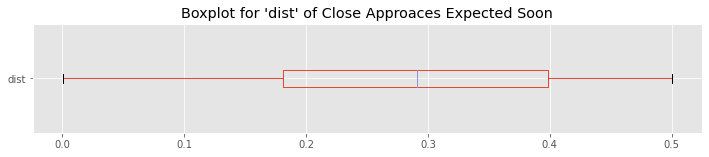

In [185]:
cad_df['dist'] = pd.to_numeric(cad_df['dist'], errors='coerce')
ax = cad_df.loc[(cad_df.cd >"2001-Feb-25") & (cad_df.cd < "2002-Jan-1")].boxplot(column='dist', vert=False, figsize=(12, 2))
ax.set_title("Boxplot for 'dist' of Close Approaches Expected Soon")
plt.show()

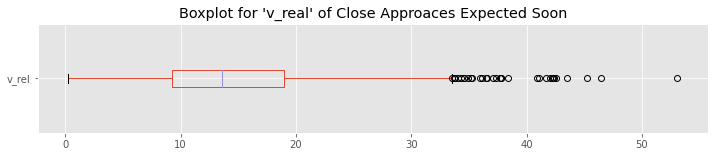

In [360]:
cad_df['v_rel'] = pd.to_numeric(cad_df['v_rel'], errors='coerce')
ax = cad_df.loc[(cad_df.cd >"2001-Feb-25") & (cad_df.cd < "2002-Jan-1")].boxplot(column='v_rel', vert=False, figsize=(12, 2))
ax.set_title("Boxplot for 'v_real' of Close Approaces Expected Soon")
plt.show()

In [367]:
pha_neos_df = neos_df.loc[
    (neos_df.pha == "Y") & 
    (neos_df.albedo > 0.05) & 
    (neos_df.diameter >0.05)].set_index('pdes')
pha_neos_df = pha_neos_df[['name','diameter', 'albedo']]

In [412]:
exp_cad_df = cad_df.loc[(cad_df.cd > "2021-Feb-25") & (cad_df.cd < "2022-Jan-1")].set_index('des')
exp_cad_df = exp_cad_df[['dist', 'dist_min', 'dist_max', 'v_rel']]

In [413]:
exp_pha_df = pha_neos_df.join(exp_cad_df, how='inner')
exp_pha_df.diameter = exp_pha_df.diameter * 500
exp_pha_df.albedo = 1 / exp_pha_df.albedo

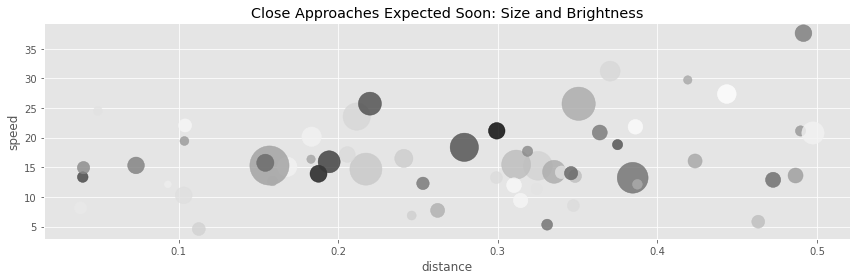

In [414]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter('dist', 'v_rel', s='diameter', c='albedo', cmap="binary",  data=exp_pha_df, alpha=0.8)
ax.set_xlabel('distance')
ax.set_ylabel('speed')
ax.set_title("Close Approaches Expected Soon: Size and Brightness")
ax.grid(True)
fig.tight_layout()
plt.show()

In [417]:
exp_pha_df.loc[(exp_pha_df.dist > 0.1) & (exp_pha_df.dist < 0.13 )]

,name,diameter,albedo,dist,dist_min,dist_max,v_rel
140158,NaN,283.0,3.460208,0.103213,0.103212170846793,0.103213154202757,10.265369
411165,NaN,79.5,8.264463,0.103622,0.103622002421701,0.103622893247802,19.432650
523664,NaN,173.0,1.865672,0.104040,0.10403879443231,0.104041266036692,22.056207
99942,Apophis,170.0,4.347826,0.112651,0.112650515057284,0.112651754747827,4.584526


In [420]:
result = exp_pha_df.loc[(exp_pha_df.dist > 0.1) & (exp_pha_df.dist < 0.13 )].copy()
result.diameter = result.diameter / 500
result.albedo = 1 / result.albedo

In [425]:
result.loc[result.name != ']

,name,diameter,albedo,dist,dist_min,dist_max,v_rel
140158,NaN,0.566,0.289,0.103213,0.103212170846793,0.103213154202757,10.265369
411165,NaN,0.159,0.121,0.103622,0.103622002421701,0.103622893247802,19.432650
523664,NaN,0.346,0.536,0.104040,0.10403879443231,0.104041266036692,22.056207
99942,Apophis,0.340,0.230,0.112651,0.112650515057284,0.112651754747827,4.584526


In [385]:
 1 / (1 / 0.2 )

0.2

In [384]:
1 / 5

0.2

In [407]:
exp_pha_df.shape

(56, 7)

In [429]:
exp_pha_df.sort_values(by = 'name')

,name,diameter,albedo,dist,dist_min,dist_max,v_rel
1862,Apollo,750.0,4.000000,0.211619,0.211618795873319,0.211619474339081,23.554582
99942,Apophis,170.0,4.347826,0.112651,0.112650515057284,0.112651754747827,4.584526
161989,Cacus,950.0,11.111111,0.384567,0.384565677258948,0.384567418275145,13.226983
3361,Orpheus,150.0,2.801120,0.038561,0.0385606500816589,0.0385609533285204,8.139399
4034,Vishnu,210.0,1.923077,0.314341,0.314339666888936,0.314342907229853,9.396137
12923,Zephyr,1030.0,5.025126,0.217383,0.21738191797197,0.217384524314969,14.684496
12538,NaN,831.5,4.310345,0.325186,0.325185853972421,0.325186364687277,15.247528
138127,NaN,377.0,2.227171,0.168100,0.168099704654955,0.168100918549164,15.083358
138127,NaN,377.0,2.227171,0.183336,0.183335297617954,0.183337134227403,20.159609
140158,NaN,283.0,3.460208,0.103213,0.103212170846793,0.103213154202757,10.265369
